
About the dataset :
-----------------------
This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver.


Problem Identification :
----------------------------

When applying machine learning models to domains such as customer behavior analysis, in addition to a reliable decision, one would also like to understand how this decision is generated, and more importantly, what the decision says about the data itself
Our goal is to construct rule set models that serve this purpose: 
the model provides predictions and also descriptions of a class, which are reasons for a prediction. Here is an example of a rule set

model for predicting whether a customer will accept a coupon for a nearby coffee house, where the
coupon is presented by their car’s mobile recommendation device

if a customer (goes to coffee houses ≥ once per month AND destination = no urgent place AND
passenger is not kids)

OR (goes to coffee houses ≥ once per month AND the time until coupon expires = one day)

then

predict the customer will accept the coupon for a coffee house.



Objective :
-------------

Our goal is to perform classification using four distinct techniques: K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and XGBoost. The ultimate aim is to assess and determine the most effective technique for our specific dataset.




In [1]:
# <1> importing the dataset into a variable "ds" as in DataSet

import pandas as pd

ds = pd.read_csv("/Users/rohanbasak/Downloads/in-vehicle-coupon-recommendation 4 (1).csv")

# Checking if the Dataset is loaded Properly.

ds.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [2]:
# <2> Data Exploration

ds.shape

(12684, 26)

In [3]:
ds.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [4]:
ds.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
# as the car column has 12,576 missing values among 12,684 records, we sill be deleting the column from the dataset.

ds=ds.drop(['car'],axis=1)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
# correcting all the missing values

# Function to replace missing values with mode for multiple columns
def replace_missing_with_mode(df, columns):
    for col in columns:
        mode_value = df[col].mode()[0]  # Calculate mode
        df[col].fillna(mode_value, inplace=True)  # Replace missing values with mode


columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

replace_missing_with_mode(ds,columns)

ds.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

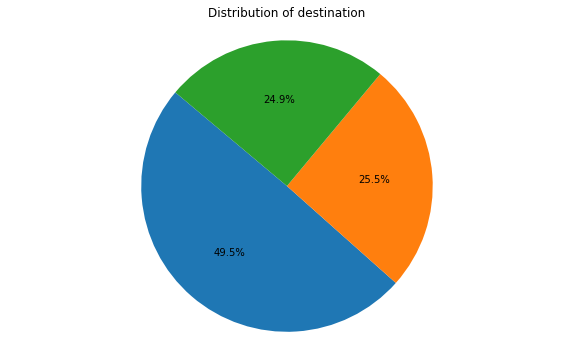

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.pie(ds['destination'].value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of destination')
plt.axis('equal')
plt.show()

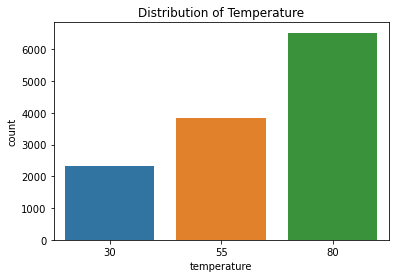

In [8]:
# Creating Bar chart for the 'team' variable

sns.countplot(x='temperature', data=ds)
plt.title('Distribution of Temperature')
plt.show()

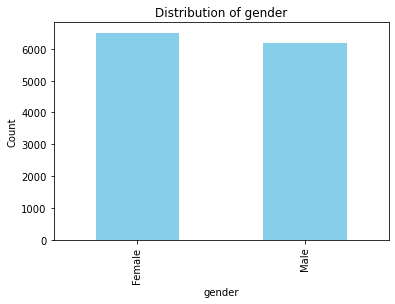

In [9]:
categorical_column = 'gender'
ds[categorical_column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Distribution of {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.show()

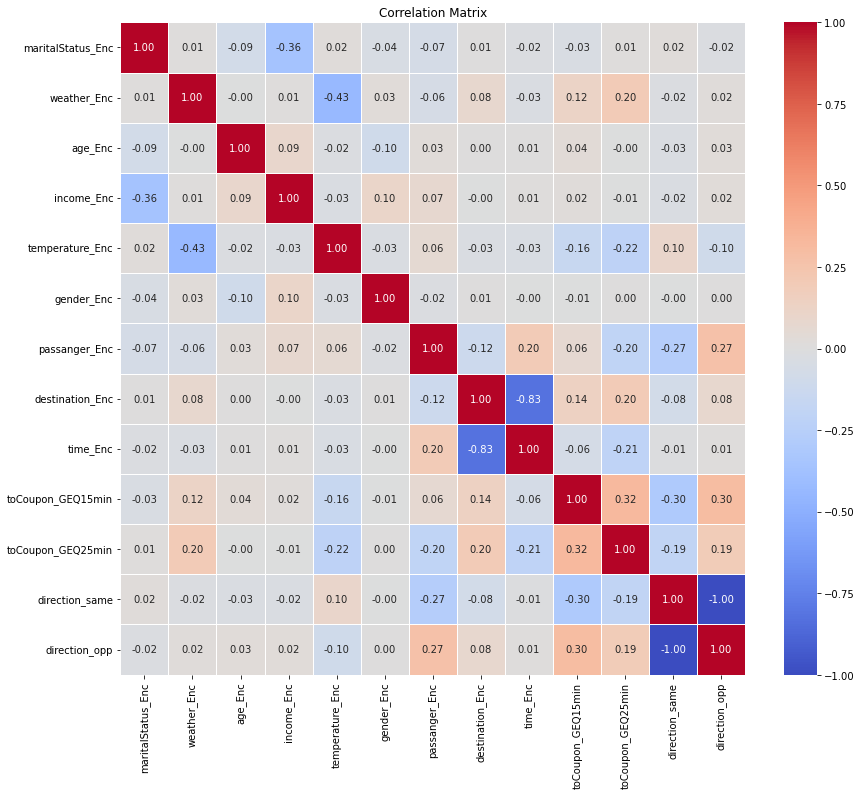

In [60]:
#Finding correlation & Visualizing it
selected_columns = ['maritalStatus_Enc','weather_Enc','age_Enc','income_Enc','temperature_Enc','gender_Enc','passanger_Enc','destination_Enc',
        'time_Enc','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']

selected_ds = ds[selected_columns]
#for caluculation
correlation_matrix = selected_ds.corr()

#  For Visualize
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ds["temperature_Enc"]=ss.fit_transform(ds[['temperature']])
ds.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,temperature_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,1,-0.433430
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,0,0.871799
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,0.871799
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,0.871799
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,0.871799
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,0.871799
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,-0.433430
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,0.871799
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,0.871799
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,0.871799


In [11]:
#label Encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ds['maritalStatus_Enc'] = ds['maritalStatus'].map({'Married partner':0,'Single':1,'Unmarried partner':2, 'Divorced':3, 'Widowed':4}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,temperature_Enc,maritalStatus_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,-0.433430,2
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,0.871799,2
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,0.871799,2
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,0.871799,2
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,0.871799,2


In [12]:
ds['weather'].value_counts()

ds['weather_Enc'] = ds['weather'].map({'Sunny':0,'Snowy':1,'Rainy':2}).astype(int)

ds.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,temperature_Enc,maritalStatus_Enc,weather_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,1,-0.433430,2,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,0.871799,2,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,0.871799,2,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,0.871799,2,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,0.871799,2,0


In [13]:
ds['age'].value_counts()

ds['age_Enc'] = ds['age'].map({'below21': 20, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 50}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,temperature_Enc,maritalStatus_Enc,weather_Enc,age_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1,0,0,0,1,1,-0.433430,2,0,21
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,0,0,1,0,0.871799,2,0,21
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,1,0,0,1,1,0.871799,2,0,21
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,1,0,0,1,0,0.871799,2,0,21
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,1,0,0,1,0,0.871799,2,0,21


In [14]:
ds['income'].value_counts()

ds['income_Enc'] = ds['income'].map({
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}).astype(int)

ds.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,temperature_Enc,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,0,1,1,-0.433430,2,0,21,3
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,0,1,0,0.871799,2,0,21,3
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,0,0,1,1,0.871799,2,0,21,3
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,0,1,0,0.871799,2,0,21,3
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,0,0,1,0,0.871799,2,0,21,3


In [15]:
ds['gender'].value_counts()

ds['gender_Enc'] = ds['gender'].map({'Female': 0, 'Male': 1,}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ25min,direction_same,direction_opp,Y,temperature_Enc,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc,gender_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,1,1,-0.433430,2,0,21,3,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,1,0,0.871799,2,0,21,3,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,0,1,1,0.871799,2,0,21,3,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,1,0,0.871799,2,0,21,3,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,0,1,0,0.871799,2,0,21,3,0


In [16]:
ds['destination'].value_counts()

ds['destination_Enc'] = ds['destination'].map({'Home': 0, 'No Urgent Place': 1, 'Work':2}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_same,direction_opp,Y,temperature_Enc,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc,gender_Enc,destination_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,1,1,-0.433430,2,0,21,3,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,1,0,0.871799,2,0,21,3,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,1,1,0.871799,2,0,21,3,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,1,0,0.871799,2,0,21,3,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,1,0,0.871799,2,0,21,3,0,1


In [17]:
ds['passanger'].value_counts()

ds['passanger_Enc'] = ds['passanger'].map({'Alone': 0, 'Friend(s)': 1, 'Kid(s)':2, 'Partner':3}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_opp,Y,temperature_Enc,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc,gender_Enc,destination_Enc,passanger_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1,1,-0.433430,2,0,21,3,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,0.871799,2,0,21,3,0,1,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,1,0.871799,2,0,21,3,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,0.871799,2,0,21,3,0,1,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,0,0.871799,2,0,21,3,0,1,1


In [18]:
ds['time'].value_counts()

ds['time_Enc'] = ds['time'].map({'7AM': 0, '10AM': 1, '2PM':2, '6PM':3, '10PM':4}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Y,temperature_Enc,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc,gender_Enc,destination_Enc,passanger_Enc,time_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1,-0.433430,2,0,21,3,0,1,0,2
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0.871799,2,0,21,3,0,1,1,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,0.871799,2,0,21,3,0,1,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0.871799,2,0,21,3,0,1,1,2
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,0.871799,2,0,21,3,0,1,1,2


In [19]:
ds.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
temperature_Enc         0
maritalStatus_Enc       0
weather_Enc             0
age_Enc                 0
income_Enc              0
gender_Enc              0
destination_Enc         0
passanger_Enc           0
time_Enc                0
dtype: int64

In [20]:
# Decision Tree

from sklearn.model_selection import train_test_split

y=ds['Y']
x = ds[['maritalStatus_Enc','weather_Enc','age_Enc','income_Enc','temperature_Enc','gender_Enc','passanger_Enc','destination_Enc',
        'time_Enc','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp',]]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) #70% training part

In [21]:
# Importing Packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [22]:
# Creating the Model

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )


In [23]:
ct.fit(X_train,y_train) # Feeding the model with data to Train

DecisionTreeClassifier()

In [24]:
y_pred = ct.predict(X_test) # Now trying to predict the outputs for the X_test data

In [25]:
confusion_matrix(y_test, y_pred) # Creating the Confusion Matrix

array([[ 930,  713],
       [ 902, 1261]])

In [26]:
accuracy_score(y_test, y_pred) # Checking the Accuracy

0.5756699947451392

In [27]:
precision_score(y_test, y_pred)# Checking the Precision

0.6388044579533941

In [28]:
recall_score(y_test, y_pred)# Checking the Recall

0.5829865926953306

In [29]:
f1_score(y_test, y_pred)# Checking the F1 Score

0.609620497945371

In [30]:
X_train.columns

Index(['maritalStatus_Enc', 'weather_Enc', 'age_Enc', 'income_Enc',
       'temperature_Enc', 'gender_Enc', 'passanger_Enc', 'destination_Enc',
       'time_Enc', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

[Text(0.5, 0.875, 'node #0\npassanger_Enc <= 0.5\ngini = 0.491\nsamples = 8878\nvalue = [3831, 5047]\nclass = Reject'),
 Text(0.25, 0.625, 'node #1\ntoCoupon_GEQ15min <= 0.5\ngini = 0.499\nsamples = 5173\nvalue = [2447, 2726]\nclass = Reject'),
 Text(0.125, 0.375, 'node #2\ntime_Enc <= 2.5\ngini = 0.482\nsamples = 2597\nvalue = [1052, 1545]\nclass = Reject'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #2047\ntemperature_Enc <= 0.219\ngini = 0.497\nsamples = 2576\nvalue = [1395, 1181]\nclass = Accept'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #4266\npassanger_Enc <= 1.5\ngini = 0.468\nsamples = 3705\nvalue = [1384, 2321]\nclass = Reject'),
 Text(0.625, 0.375, 'node #4267\nweather_Enc <= 1.5\ngini = 0.445\nsamples = 2290\nvalue = [764, 1526]\nclass = Reject'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #60

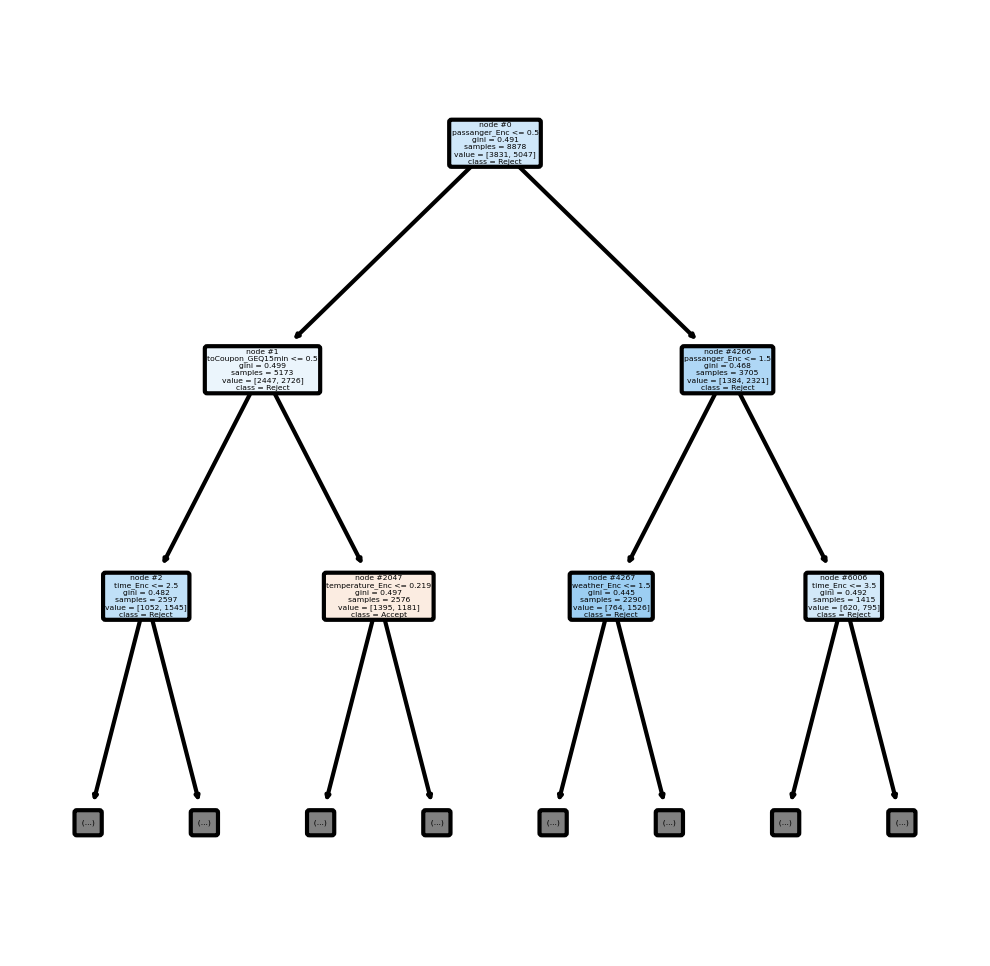

In [31]:
# Creating the Visual Decision Tree model

from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(ct, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['maritalStatus_Enc','weather_Enc','age_Enc','income_Enc','temperature_Enc','gender_Enc','passanger_Enc','destination_Enc',
        'time_Enc','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp'],
               
            class_names = ["Accept","Reject"]
              )
#fig.savefig('C://Users//IMI KOLKATA//Desktop//plottreedefault.png')

In [32]:
# kNN
# Importing Packages

from sklearn.neighbors import KNeighborsClassifier


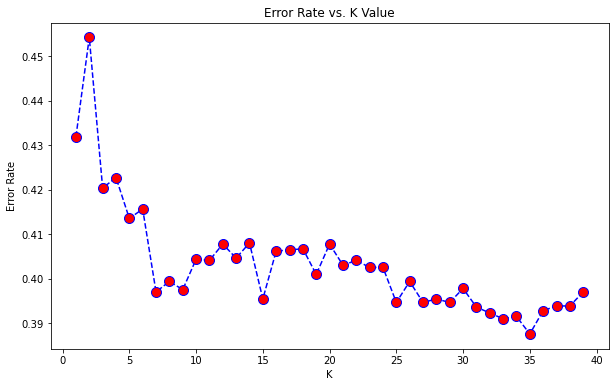

Minimum error:- 0.3875459800315292 at K = 35


In [33]:
# To find out the best k value between 1 to 40 for our dataset

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [34]:
# As we have got the K value as 35 we will be trainning the model according to 35 nearest neighbours.

knn = KNeighborsClassifier(n_neighbors=35, metric='euclidean') # Creating the Model with Euclidean Distance Method

knn.fit(X_train, y_train)# Feeding the model with data to Train

KNeighborsClassifier(metric='euclidean', n_neighbors=35)

In [35]:
y_pred = knn.predict(X_test)  # Now trying to predict the outputs for the X_test data

In [36]:
confusion_matrix(y_test, y_pred) # Creating the Confusion Matrix

array([[ 587, 1056],
       [ 419, 1744]])

In [37]:
accuracy_score(y_test, y_pred)# Checking the Accuracy

0.6124540199684708

In [38]:
precision_score(y_test, y_pred)# Checking the Precision

0.6228571428571429

In [39]:
recall_score(y_test, y_pred)# Checking the Recall

0.806287563569117

In [40]:
f1_score(y_test, y_pred)# Checking the F1 Score

0.7028007253677212

In [41]:
# Random Forest

#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Creating a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

# Feeding the model with data to Train
clf1.fit(X_train,y_train)

# Now trying to predict the outputs for the X_test data
y_pred1=clf1.predict(X_test)

In [42]:
#Importing scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Calculating the Accuracy and printing it.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.6103520756699947


In [43]:
# Creating the Confusion Matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred1)

array([[ 851,  792],
       [ 691, 1472]])

In [44]:
# Printing Classification Report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.55      0.52      0.53      1643
           1       0.65      0.68      0.67      2163

    accuracy                           0.61      3806
   macro avg       0.60      0.60      0.60      3806
weighted avg       0.61      0.61      0.61      3806



In [45]:
# Calcualting and Printing the Accuracy, Recall and F1 Score

print ("Precision ", precision_score(y_test, y_pred1))
print ("Recall ",recall_score(y_test, y_pred1))
print ("F1 Score ",f1_score(y_test, y_pred1))

Precision  0.6501766784452296
Recall  0.6805362921867776
F1 Score  0.6650101648972214


In [46]:
X_train.columns

Index(['maritalStatus_Enc', 'weather_Enc', 'age_Enc', 'income_Enc',
       'temperature_Enc', 'gender_Enc', 'passanger_Enc', 'destination_Enc',
       'time_Enc', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

In [47]:
# Calculating the Feature Importance

import pandas as pd
feature_imp = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

income_Enc           0.292772
age_Enc              0.244724
maritalStatus_Enc    0.108137
time_Enc             0.076855
temperature_Enc      0.060242
passanger_Enc        0.048343
gender_Enc           0.046047
toCoupon_GEQ15min    0.040350
weather_Enc          0.030326
destination_Enc      0.020546
toCoupon_GEQ25min    0.014320
direction_opp        0.008703
direction_same       0.008634
toCoupon_GEQ5min     0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


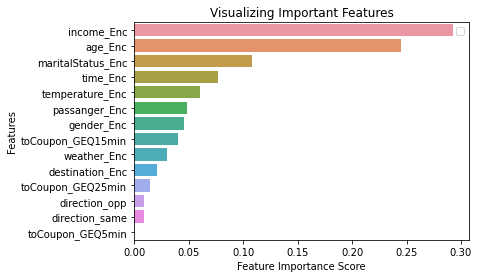

In [48]:
#visualizing feature importance results

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [49]:
!pip install xgboost

In [50]:
# XG Boost

# Importing XG Boost package

import xgboost as xgb

# Creating the Model
model = xgb.XGBClassifier()

# Feeding the model with data to Train
model.fit(X_train, y_train)

# Now trying to predict the outputs for the X_test data
y_pred=model.predict(X_test)

In [51]:
confusion_matrix(y_test, y_pred) # Creating the Confusion Matrix

array([[ 872,  771],
       [ 575, 1588]])

In [52]:
X_train.columns

Index(['maritalStatus_Enc', 'weather_Enc', 'age_Enc', 'income_Enc',
       'temperature_Enc', 'gender_Enc', 'passanger_Enc', 'destination_Enc',
       'time_Enc', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

In [53]:
accuracy_score(y_test, y_pred) # Checking the Accuracy Score

0.6463478717813977

In [54]:
precision_score(y_test, y_pred) # Checking the Precision

0.6731665960152607

In [55]:
recall_score(y_test, y_pred) # Checking the Recall Score

0.73416551086454

In [56]:
f1_score(y_test, y_pred) # Checking the F1 Score

0.70234409553295

In [57]:
#The best model will be selected on the basis of 'F1 SCORE'.
#F1 SCORE FOR DECISION TREE MODEL: 0.609620497945371
#F1 SCORE FOR RANDOM FOREST MODEL: 0.6650101648972214
#F1 SCORE FOR XGBOOST MODEL: 0.70234409553295
#F1 SCORE FOR KNN CLASSIFIER MODEL: 0.7028007253677212
#Since the F1 Score is highest for KNN Model it is the best Model based on the daatset.